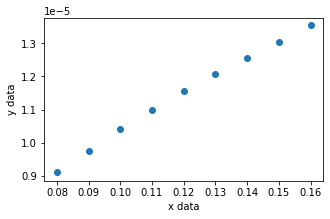

Optimised parameters =  [5.27624010e-05 5.13138287e-06] 

Covariance matrix = 
 [[ 2.37025531e-14 -3.37246228e-15]
 [-3.37246228e-15  4.89241349e-16]]


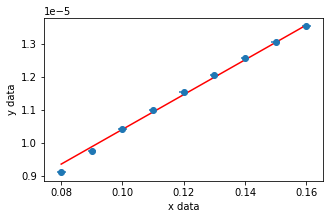

chi^2_min = 180.31169394996388
reduced chi^2 = 25.75881342142341
P(chi^2_min, DoF) = 1.674158640384069e-35
best fit slope = 5.276240102285215e-05
best fit intercept = 5.131382865045101e-06
[1.53956335e-07 2.21188008e-08]
optimised parameter[0] = (5.276240102285215e-05 +/- 1.5395633496119179e-07) units
optimised parameter[1] = (5.131382865045101e-06 +/- 2.211880080831326e-08) units


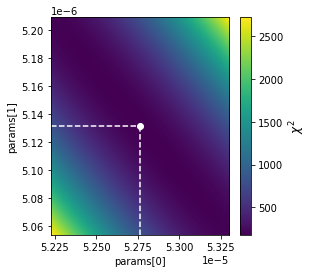

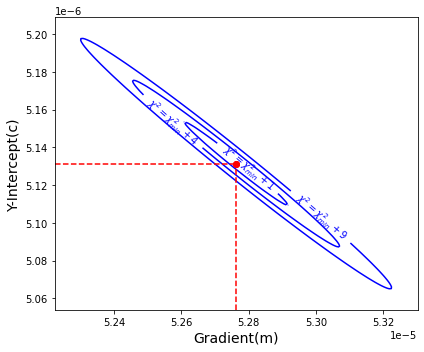

params[0] = (5.276240100111525e-05 +/- 9.161301329266067e-08) units
params[1] = (5.131382868118426e-06 +/- 1.3626132918886853e-08) units
Visosity of Water 7.724023395344932
Desnity at 17.3 degrees 998.7218102978122
Error in density 0.03566955818723727
Error in Tempreture 0.1999999999999993
Error in a 0.007071067811865475
Error in l 0.07071067811865477
Error in the Visocity of Water 0.19874698574344374


In [21]:
#Chi-Squared Analysis of the Data

%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import scipy.optimize
import scipy.stats

density = 998.72
rel_err_rho = 0.04 / density  

import numpy as np

x_values = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])

y_values = (1 / density)*numpy.array([0.009087019700775476, 0.00973382312751785, 0.010405167413176602, 0.010982996266358644,
                        0.01153379015104771, 0.012047738543439511, 0.012546626677279848, 0.013031795046230364,
                        0.013524393787771606])

y_errors = (1 / density) * np.array([
   0.009087019700775476*np.sqrt((2.796671888202458e-05 / 0.009087019700775476)**2 + rel_err_rho**2),
   0.00973382312751785*np.sqrt((2.618159765127191e-05 / 0.00973382312751785)**2 + rel_err_rho**2),
   0.010405167413176602*np.sqrt((1.0412106977779797e-05 / 0.010405167413176602)**2 + rel_err_rho**2),
   0.010982996266358644*np.sqrt((1.2872391432251212e-05 / 0.010982996266358644)**2 + rel_err_rho**2),
   0.01153379015104771*np.sqrt((2.4403477270259047e-05 / 0.01153379015104771)**2 + rel_err_rho**2),
   0.012047738543439511*np.sqrt((2.1878017205758983e-05 / 0.012047738543439511)**2 + rel_err_rho**2),
   0.012546626677279848*np.sqrt((1.756561860138343e-05 / 0.012546626677279848)**2 + rel_err_rho**2),
   0.013031795046230364*np.sqrt((3.927328347597808e-06 / 0.013031795046230364)**2 + rel_err_rho**2),
   0.013524393787771606*np.sqrt((7.436965355352326e-06 / 0.013524393787771606)**2 + rel_err_rho**2)
])

x_errors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data')
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x + params[1]


initial_values = numpy.array([0.5, 0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, 
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data')
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, model_function(x_values, *popt), color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

print('best fit slope = {}'.format(popt[0]))
print('best fit intercept = {}'.format(popt[1]))

popt_errs = numpy.sqrt(numpy.diag(cov))
print(popt_errs)

for i, (val, err) in enumerate(zip(popt, popt_errs)):
    print('optimised parameter[{}] = ({} +/- {}) units'.format(i, val, err))
    
assert(popt.size == 2) # contour plot only 'works' for 2D parameter space!

extent = 3.5 # standard errors
#extent= 50
n_points = 100 # mesh density         

p0_range = extent * popt_errs[0]
p1_range = extent * popt_errs[1]

# Generate grid and data
p0_axis = numpy.linspace(popt[0]-p0_range, popt[0]+p0_range, num=n_points)
p1_axis = numpy.linspace(popt[1]-p1_range, popt[1]+p1_range, num=n_points)
plot_data = numpy.zeros((n_points, n_points))

for j, p1_val in enumerate(p1_axis): 
    for i, p0_val in enumerate(p0_axis): # Nested loops for 'clarity'...
        plot_data[j][i] = chi_squared([p0_val, p1_val], # function evaluated n_points*n_points times!
                                      model_function, 
                                      x_values, 
                                      y_values, 
                                      y_errors)
        
assert(popt.size == 2) # contour plot only 'works' for 2D parameter space!

plt.figure(figsize=(4,4))
im = plt.imshow(plot_data, # grid of chi-squared values
                extent=(p0_axis[0], p0_axis[-1], # 'x' range
                        p1_axis[0], p1_axis[-1]), # 'y' range
                origin='lower', aspect='auto')

plt.xlim(popt[0]-p0_range, popt[0]+p0_range) # axis ranges
plt.ylim(popt[1]-p1_range, popt[1]+p1_range)

plt.ylabel('params[1]') 
plt.xlabel('params[0]')

cbar=plt.colorbar(im, orientation='vertical') # Colorbar and label
cbar.set_label('$\chi^2$', fontsize=12)

# Add in best fit point and dashed lines to the axes
plt.plot(popt[0], popt[1], 'wo') 
plt.plot((popt[0], popt[0]), (p1_axis[0], popt[1]), # vertical line
         linestyle='--', color='w')
plt.plot((p0_axis[0], popt[0]), (popt[1], popt[1]), # horizontal line
         linestyle='--', color='w')
plt.show()

assert(popt.size == 2) # contour plot only 'works' for 2D parameter space!

X, Y = numpy.meshgrid(p0_axis, p1_axis, indexing='xy')
contour_data = plot_data - chi_squared_min

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------------------
# 1. Data
# -----------------------------------------
x_values = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])

y_values = (1 / density)*numpy.array([0.009087019700775476, 0.00973382312751785, 0.010405167413176602, 0.010982996266358644,
                        0.01153379015104771, 0.012047738543439511, 0.012546626677279848, 0.013031795046230364,
                        0.013524393787771606])

y_errors = (1 / density) * np.array([
   0.009087019700775476*np.sqrt((2.796671888202458e-05 / 0.009087019700775476)**2 + rel_err_rho**2),
   0.00973382312751785*np.sqrt((2.618159765127191e-05 / 0.00973382312751785)**2 + rel_err_rho**2),
   0.010405167413176602*np.sqrt((1.0412106977779797e-05 / 0.010405167413176602)**2 + rel_err_rho**2),
   0.010982996266358644*np.sqrt((1.2872391432251212e-05 / 0.010982996266358644)**2 + rel_err_rho**2),
   0.01153379015104771*np.sqrt((2.4403477270259047e-05 / 0.01153379015104771)**2 + rel_err_rho**2),
   0.012047738543439511*np.sqrt((2.1878017205758983e-05 / 0.012047738543439511)**2 + rel_err_rho**2),
   0.012546626677279848*np.sqrt((1.756561860138343e-05 / 0.012546626677279848)**2 + rel_err_rho**2),
   0.013031795046230364*np.sqrt((3.927328347597808e-06 / 0.013031795046230364)**2 + rel_err_rho**2),
   0.013524393787771606*np.sqrt((7.436965355352326e-06 / 0.013524393787771606)**2 + rel_err_rho**2)
])

# -----------------------------------------
# 2. Model and chi-squared
# -----------------------------------------
def model(x, m, c):
    return m*x + c

def chi2(params):
    m, c = params
    return np.sum(((y_values - model(x_values, m, c)) / y_errors)**2)

# -----------------------------------------
# 3. Fit the model
# -----------------------------------------
popt, pcov = curve_fit(model, x_values, y_values,
                       sigma=y_errors, absolute_sigma=True)

m_best, c_best = popt
chi2_min = chi2(popt)
perr = np.sqrt(np.diag(pcov))

# -----------------------------------------
# 4. Build chi2 grid (adaptive range)
# -----------------------------------------
levels = [1, 4, 9]
mult = 3.5
max_mult = 1e6

def make_grid(mult):
    m_range = mult * perr[0]
    c_range = mult * perr[1]
    m_axis = np.linspace(m_best - m_range, m_best + m_range, 180)
    c_axis = np.linspace(c_best - c_range, c_best + c_range, 180)
    M, C = np.meshgrid(m_axis, c_axis)
    Z = np.zeros_like(M)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            Z[i,j] = chi2([M[i,j], C[i,j]]) - chi2_min
    return m_axis, c_axis, Z

while True:
    m_axis, c_axis, Z = make_grid(mult)
    if Z.max() > 9:
        break
    mult *= 2
    if mult > max_mult:
        raise RuntimeError("Could not find Δχ²=9 region — range too small")

# -----------------------------------------
# 5. Plot ONLY the 3 blue contour lines
# -----------------------------------------
plt.figure(figsize=(6,5))

# Blue contour lines only
CS = plt.contour(m_axis, c_axis, Z, levels=levels, colors='blue')
plt.clabel(CS, inline=True, fontsize=10, fmt={1: "$\chi^2 = \chi^2_{min}+1$", 4: "$\chi^2 = \chi^2_{min}+4$", 9: "$\chi^2 = \chi^2_{min}+9$"})

# Best-fit point
plt.plot(m_best, c_best, 'ro')
# Add in best fit point and dashed lines to the axes
plt.plot(popt[0], popt[1], 'ro') 
plt.plot((popt[0], popt[0]), (p1_axis[0], popt[1]), linestyle='--', color='r')
plt.plot((p0_axis[0], popt[0]), (popt[1], popt[1]), linestyle='--', color='r')


plt.xlabel("Gradient(m)", fontsize=14)
plt.ylabel("Y-Intercept(c)", fontsize=14)
plt.tight_layout()
plt.show()

for i, (v, e) in enumerate(zip(popt, errs_graphical)):
    print('params[{}] = ({} +/- {}) units'.format(i, v, e))           

def p(T):
    
    return (999.85308 + 6.3269*10**(-2)*T - 8.523829*10**(-3)*T**2 + 6.943248*10**(-5)*T**3 -3.821216*10**(-7)*T**4)

T=[17.1,17.5]

def std_dev(X):

    mean = sum(X)/len(X)

    variance = sum((x - mean) ** 2 for x in X) / (len(X) - 1)

    return variance ** 0.5

n=((numpy.pi*p(17.3)*9.80665*(2*10**-3)**4)/(8*5.276240100111525e-05*0.151))*1000

print('Visosity of Water', n)
print('Desnity at 17.3 degrees' , p(17.3))

print('Error in density', abs(p(17.3+std_dev(T)/numpy.sqrt(2))-p(17.3)))
print('Error in Tempreture', std_dev(T)/numpy.sqrt(2))

a_a = numpy.sqrt(2*0.005**2)
a_l = numpy.sqrt(2*0.05**2)

print('Error in a', a_a)
print('Error in l', a_l)

a_n = n*numpy.sqrt(((abs(p(17.3+std_dev(T)/numpy.sqrt(2))-p(17.3)))/p(17.3))**2 + ((4*a_a)/1.125)**2 + (1.4975962615589695e-07/5.276240100111525e-05)**2 + (a_l/15.1)**2)

print('Error in the Visocity of Water', a_n)

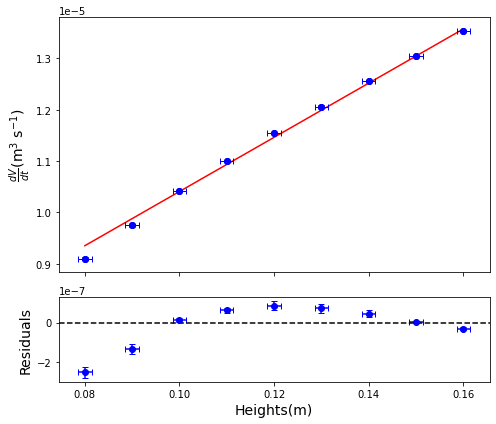

In [48]:
#Straight Line Graph for the Above Data

import numpy

import matplotlib.pyplot as plt

xvalues = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])

yvalues = (1 / density)*numpy.array([0.009087019700775476, 0.00973382312751785, 0.010405167413176602, 0.010982996266358644,
                        0.01153379015104771, 0.012047738543439511, 0.012546626677279848, 0.013031795046230364,
                        0.013524393787771606])

yerrors = (1 / density) * np.array([
   0.009087019700775476*np.sqrt((2.796671888202458e-05 / 0.009087019700775476)**2 + rel_err_rho**2),
   0.00973382312751785*np.sqrt((2.618159765127191e-05 / 0.00973382312751785)**2 + rel_err_rho**2),
   0.010405167413176602*np.sqrt((1.0412106977779797e-05 / 0.010405167413176602)**2 + rel_err_rho**2),
   0.010982996266358644*np.sqrt((1.2872391432251212e-05 / 0.010982996266358644)**2 + rel_err_rho**2),
   0.01153379015104771*np.sqrt((2.4403477270259047e-05 / 0.01153379015104771)**2 + rel_err_rho**2),
   0.012047738543439511*np.sqrt((2.1878017205758983e-05 / 0.012047738543439511)**2 + rel_err_rho**2),
   0.012546626677279848*np.sqrt((1.756561860138343e-05 / 0.012546626677279848)**2 + rel_err_rho**2),
   0.013031795046230364*np.sqrt((3.927328347597808e-06 / 0.013031795046230364)**2 + rel_err_rho**2),
   0.013524393787771606*np.sqrt((7.436965355352326e-06 / 0.013524393787771606)**2 + rel_err_rho**2)
])

xerrors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])


import scipy.optimize as scpo 

def Line1(x, gradient1, intercept1): 
    
    return gradient1*x + intercept1  

fit_gradient1 = 5.276240100111525e-05

fit_intercept1 = 5.131382868118426e-06

ybestfit1 = Line1(xvalues, fit_gradient1, fit_intercept1) 

residuals1 = yvalues - ybestfit1

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]},figsize=(7,6))

ax1.scatter(xvalues, yvalues, color="blue")
ax1.plot(xvalues, ybestfit1, color="red")

ax1.errorbar(xvalues, yvalues, xerr=xerrors, yerr=yerrors,fmt='o', color="blue", elinewidth=1, capsize=3)

ax1.set_ylabel(r"$\frac{dV}{dt}$(m$^3$ s$^{-1}$)", fontsize=14)

ax2.errorbar(xvalues, residuals1, xerr=xerrors, yerr=yerrors, fmt='o', color="blue", capsize=3)

ax2.axhline(0, color="black", linestyle="--")
ax2.set_xlabel("Heights(m)", fontsize=14)
ax2.set_ylabel("Residuals", fontsize=14)

plt.tight_layout()
plt.show()

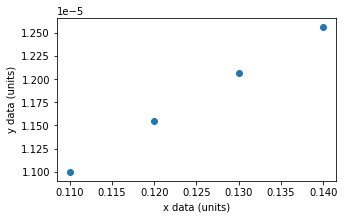

Optimised parameters =  [5.23234602e-05 5.24726756e-06] 

Covariance matrix = 
 [[ 4.87257291e-13 -5.94192848e-14]
 [-5.94192848e-14  7.32289386e-15]]


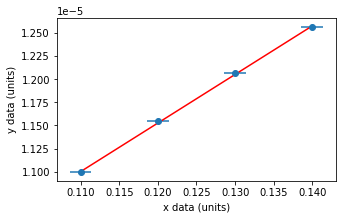

chi^2_min = 1.760690425578094
reduced chi^2 = 0.880345212789047
P(chi^2_min, DoF) = 0.41463974802817427
best fit slope = 5.232346023653864e-05 units?
best fit intercept = 5.247267560216755e-06 units?
optimised parameter[0] = (5.232346023653864e-05 +/- 6.980381732191317e-07) units
optimised parameter[1] = (5.247267560216755e-06 +/- 8.557390878249152e-08) units
Visosity of Water 6.154335721429845
Error in the Visocity of Water 0.2033566647219268


In [20]:
#Re-Calculating Chi-Squared for Less Data Points

x_values = 0.01*numpy.array([11,12,13,14])

y_values = (1 / density)*numpy.array([0.010982996266358644,
                        0.01153379015104771, 0.012047738543439511, 0.012546626677279848])

y_errors = (1 / density) * np.array([

   0.010982996266358644*np.sqrt((1.2872391432251212e-05 / 0.010982996266358644)**2 + rel_err_rho**2),
   0.01153379015104771*np.sqrt((2.4403477270259047e-05 / 0.01153379015104771)**2 + rel_err_rho**2),
   0.012047738543439511*np.sqrt((2.1878017205758983e-05 / 0.012047738543439511)**2 + rel_err_rho**2), 
   0.012546626677279848*np.sqrt((1.756561860138343e-05 / 0.012546626677279848)**2 + rel_err_rho**2)
])


x_errors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data')
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x + params[1]


initial_values = numpy.array([0.5, 0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, 
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data')
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, model_function(x_values, *popt), color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

print('best fit slope = {}'.format(popt[0]))
print('best fit intercept = {}'.format(popt[1]))

for i, (val, err) in enumerate(zip(popt, popt_errs)):
    print('optimised parameter[{}] = ({} +/- {})'.format(i, val, err))

def std_dev(X):

    mean = sum(X)/len(X)

    variance = sum((x - mean) ** 2 for x in X) / (len(X) - 1)

    return variance ** 0.5

n=((numpy.pi*p(17.3)*9.80665*(2*10**-3)**4)/(8*6.621966011833056e-05*0.151))*1000

print('Visosity of Water', n)

a_n = n*numpy.sqrt(((abs(p(17.3+std_dev(T)/numpy.sqrt(2))-p(17.3)))/p(17.3))**2 + ((4*a_a)/1.125)**2 + (1.385557838507385e-06/6.621966011833056e-05)**2 + (a_l/15.1)**2)

print('Error in the Visocity of Water', a_n)

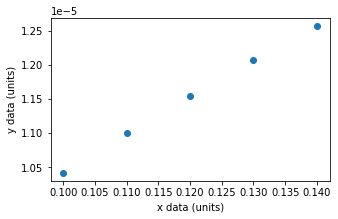

Optimised parameters =  [5.38776312e-05 5.04656199e-06] 

Covariance matrix = 
 [[ 2.15297261e-13 -2.42983762e-14]
 [-2.42983762e-14  2.78738097e-15]]


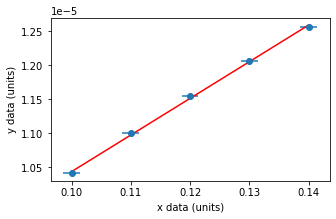

chi^2_min = 10.642314744018174
reduced chi^2 = 3.547438248006058
P(chi^2_min, DoF) = 0.013825928511435265
best fit slope = 5.387763117263717e-05 units?
best fit intercept = 5.046561986144657e-06 units?


In [15]:
#Re-Calculating Chi-Squared for Less Data Points

x_values = 0.01*numpy.array([10,11,12,13,14])

y_values = (1 / density)*numpy.array([0.010405167413176602, 0.010982996266358644,
                        0.01153379015104771, 0.012047738543439511, 0.012546626677279848])

y_errors = (1 / density) * np.array([

   0.010405167413176602*np.sqrt((1.0412106977779797e-05 / 0.010405167413176602)**2 + rel_err_rho**2),
   0.010982996266358644*np.sqrt((1.2872391432251212e-05 / 0.010982996266358644)**2 + rel_err_rho**2),
   0.01153379015104771*np.sqrt((2.4403477270259047e-05 / 0.01153379015104771)**2 + rel_err_rho**2),
   0.012047738543439511*np.sqrt((2.1878017205758983e-05 / 0.012047738543439511)**2 + rel_err_rho**2),
   0.012546626677279848*np.sqrt((1.756561860138343e-05 / 0.012546626677279848)**2 + rel_err_rho**2)
])

x_errors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data')
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x + params[1]


initial_values = numpy.array([0.5, 0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, 
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data')
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, model_function(x_values, *popt), color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

print('best fit slope = {}'.format(popt[0]))
print('best fit intercept = {}'.format(popt[1]))

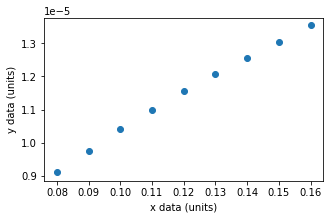

Optimised parameters =  [-1.15082294e-04  8.19481578e-05  3.35415462e-06] 

Covariance matrix = 
 [[ 8.89782201e-11 -2.25655629e-11  1.37410027e-12]
 [-2.25655629e-11  5.74650335e-12 -3.51854889e-13]
 [ 1.37410027e-12 -3.51854889e-13  2.17096204e-14]]


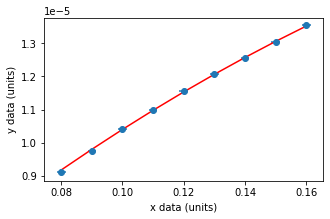

chi^2_min = 31.466975672526473
reduced chi^2 = 5.244495945421079
P(chi^2_min, DoF) = 2.064069118222026e-05


In [7]:
#Re-Calculating Chi-Squared for a Diffrent Model: Quadratic

x_values = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])

y_values = (1 / density)*numpy.array([0.009087019700775476, 0.00973382312751785, 0.010405167413176602, 0.010982996266358644,
                        0.01153379015104771, 0.012047738543439511, 0.012546626677279848, 0.013031795046230364,
                        0.013524393787771606])

y_errors = (1 / density) * np.array([
   0.009087019700775476*np.sqrt((2.796671888202458e-05 / 0.009087019700775476)**2 + rel_err_rho**2),
   0.00973382312751785*np.sqrt((2.618159765127191e-05 / 0.00973382312751785)**2 + rel_err_rho**2),
   0.010405167413176602*np.sqrt((1.0412106977779797e-05 / 0.010405167413176602)**2 + rel_err_rho**2),
   0.010982996266358644*np.sqrt((1.2872391432251212e-05 / 0.010982996266358644)**2 + rel_err_rho**2),
   0.01153379015104771*np.sqrt((2.4403477270259047e-05 / 0.01153379015104771)**2 + rel_err_rho**2),
   0.012047738543439511*np.sqrt((2.1878017205758983e-05 / 0.012047738543439511)**2 + rel_err_rho**2),
   0.012546626677279848*np.sqrt((1.756561860138343e-05 / 0.012546626677279848)**2 + rel_err_rho**2),
   0.013031795046230364*np.sqrt((3.927328347597808e-06 / 0.013031795046230364)**2 + rel_err_rho**2),
   0.013524393787771606*np.sqrt((7.436965355352326e-06 / 0.013524393787771606)**2 + rel_err_rho**2)
])

x_errors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data')
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x**2 + params[1]*x+params[2]


initial_values = numpy.array([0.5, 0.5,0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, 
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data')
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, model_function(x_values, *popt), color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))